<a href="https://colab.research.google.com/github/junyong838/-/blob/main/lossfunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공지능 HW #3

이름: 최준용

학번: 202310991

학과: 컴퓨터과학과

In [3]:
import numpy as np

class LossFunc:
  def __init__(self):
    pass
  def hinge_loss(self,W, X_tr, y_tr):
    s = W.dot(X_tr)
    y_s = s[y_tr, np.arange(X_tr.shape[1])]
    margin = np.maximum(0, s - y_s +1)
    margin[y_tr, np.arange(X_tr.shape[1])] = 0
    loss_i = np.sum(margin, axis = 0)
    return np.sum(loss_i)
  def softmax_loss(self,W, X_tr, y_tr):
    s = W.dot(X_tr)
    exp_s = np.exp(s)
    y_s = exp_s[y_tr, np.arange(X_tr.shape[1])]
    exp_total = np.sum(exp_s, axis = 0)
    probability = y_s / exp_total
    loss_i = np.log(probability) * -1
    return np.sum(loss_i)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def unpickle(file):
  import pickle
  with open('/content/drive/MyDrive/인공지능/cifar-10-batches-py/'+file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict


In [5]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'],bat4[b'data'],
bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'],
bat3[b'labels'],bat4[b'labels'], bat5[b'labels']])

In [6]:
train_data = data.T
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']

In [8]:
LF = LossFunc()
h_acc = 0
s_acc = 0
for x in ["hinge_loss", "softmax_loss"]: # hinge / softmax 반복
  for y in range(1, 4): # 각각 3번씩 실행
    bestloss = float("inf")
    num = 0 # 1000번 반복횟수 초기화
    print("%s's attempt %d" %(x, y))
    for num in range(1000):
      W = np.random.randn(10, 3072) * 0.0001
      if(x=="hinge_loss"): # hinge / softmax에 따라 loss값 도출
        loss = LF.hinge_loss(W, train_data, train_label)
      else:
        loss = LF.softmax_loss(W, train_data, train_label)
      if loss < bestloss:
        bestloss = loss
        bestW = W
        print("in attempt %d the loss was %f,best %f" % (num, loss, bestloss))
    scores = bestW.dot(test_data.T)
    Y_predict = np.argmax(scores, axis=0)
    acc = np.mean(Y_predict == test_label) *100 # 1000번 반복하며 찾은 W값의 정확도
    print("The accuracy is %f \n" % acc)
    if(x=="hinge_loss"): #각각의 평균을 구하기 위해 따로 더하기
      h_acc += acc
    else:
      s_acc += acc
h_mean = h_acc /3 #평균
s_mean = s_acc /3
print("Done")

hinge_loss's attempt 1
in attempt 0 the loss was 522907.996028,best 522907.996028
in attempt 1 the loss was 498801.029088,best 498801.029088
in attempt 2 the loss was 478694.525686,best 478694.525686
in attempt 4 the loss was 475566.585473,best 475566.585473
in attempt 5 the loss was 464174.491433,best 464174.491433
in attempt 12 the loss was 455952.931449,best 455952.931449
in attempt 36 the loss was 455729.999785,best 455729.999785
in attempt 51 the loss was 451289.420183,best 451289.420183
in attempt 160 the loss was 433068.206924,best 433068.206924
The accuracy is 10.570000 

hinge_loss's attempt 2
in attempt 0 the loss was 459822.574935,best 459822.574935
in attempt 35 the loss was 452089.875089,best 452089.875089
in attempt 101 the loss was 446807.902365,best 446807.902365
in attempt 102 the loss was 441286.116056,best 441286.116056
in attempt 202 the loss was 439715.815523,best 439715.815523
in attempt 242 the loss was 436800.417369,best 436800.417369
in attempt 522 the loss was

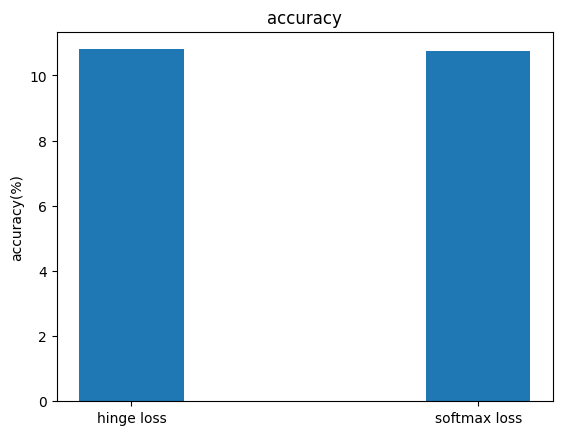

hinge loss accuracy mean: 10.803333
softmax loss accuracy mean: 10.756667


In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = ["hinge loss", "softmax loss"]
years = np.arange(100)
values = [h_mean, s_mean]

plt.title('accuracy')
plt.bar(x, values, width = 0.3)
plt.ylabel('accuracy(%)')

plt.show()

print("hinge loss accuracy mean: %f" %h_mean)
print("softmax loss accuracy mean: %f" %s_mean)

.